# ECSE 526 - A1 - DynamicConnect4 Report

__Author__ : Angus McLean - 260529744

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import Markdown, HTML

In [2]:
%%capture --no-stderr
## Run implementation notebook..
%run "./A1 - Dynamic Connect 4.ipynb"

ConnectionRefusedError: [Errno 61] Connection refused

# Question 1 - Number of States Explored MiniMax-vs-AlphaBeta

> For each of the configurations given in the assignment specifications, graph the total number of states explored by your program when using depth cutoffs of 3, 4, 5 and 6, both with minimax and alpha-beta. Assume it is white's turn to play.	

__Answer Process :__ 
- Create function to run a game with a given algo, depth, and initialState.
- Iterate all combination and track states visited and execution time
- Plot results

__Conclusion :__
- AlphaBeta pruning greatly reduces the number of states visited.
- Number of states searched with MiniMax very quickly exponentiates with increasing depth

In [3]:
startingStates = {
'a' : """
 , , , , , , 
 , , , , , , 
O, ,X, , , , 
 , , ,O, , ,X
 , , , ,O,X,X
 , ,O, , ,O,X
 , , ,X,O, , 
 """,
'b' : """
O,O, , , , , 
X, , , , , , 
 , ,X, , ,O, 
 , ,X,O, , ,X
 , , , ,O,X,
 ,X, , , , , 
O, , , , , , 
""",
'c' : """
 , ,O, ,X, , 
 , ,O, ,X, , 
 , ,X, ,O, , 
 , ,X, ,O, , 
 , , , , , , 
 , ,O, ,X, , 
 , ,X, ,O, , 
"""
}

### Test MiniMax-vs-AlphaBeta in Starting States a,b,c

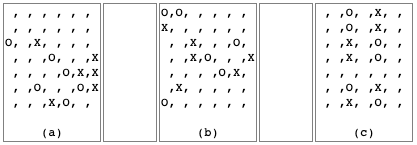

In [4]:
TEST_DEPTHS = [3,4,5,6]
START_STATES = [startingStates[name] for name in ['a','b','c']]

In [5]:
def runTestGames(testDepths, testStates, algos, verbose=False):
    dfQ1 = pd.DataFrame(columns=['algo','depth', 'statesVisited', 'initState','time', 'score'])

    for algo in algos:
        for depth in testDepths:
            for stateNum, startStr in enumerate(testStates):
                global DB_STATE
                DB_STATE = {}
                global DB_TRANSP
                DB_TRANSP = {}
                algo.count = 0
                startTime = time.time()
                score, _ = algo(put(strToState(startStr)), 1, depth)

                rowObj = {
                    'algo':algo.__name__,
                    'depth':depth ,
                    'statesVisited':algo.count ,
                    'initState':stateNum ,
                    'time':time.time()-startTime,
                    'score':score
                }

                dfQ1= dfQ1.append(rowObj, ignore_index=True)
                if verbose : print(rowObj)
                
    return dfQ1

In [6]:
dfQ1 = runTestGames(TEST_DEPTHS, START_STATES, [minimax, alphaBeta], verbose=False)

In [7]:
display(Markdown('### MiniMax-vs-AlphaBeta Testing - DataFrame'))

dfQ1

### MiniMax-vs-AlphaBeta Testing - DataFrame

,algo,depth,statesVisited,initState,time,score
0,minimax,3,3307,0,0.455527,4
1,minimax,3,3522,1,0.471711,3
2,minimax,3,3237,2,0.524340,4
3,minimax,4,21056,0,2.854944,4
4,minimax,4,33090,1,4.248054,-3
5,minimax,4,28180,2,3.737220,4
6,minimax,5,177053,0,21.735395,4
7,minimax,5,251240,1,30.519922,3
8,minimax,5,237568,2,28.832614,4
9,minimax,6,823238,0,95.942616,4


__Description :__

By iterating (algos, depths, startStates) and tracking the number of nodes visited and execution time for each run, we are well equiped to comment on any relationships within.


----

### <center>MiniMax-vs-AlphaBeta on states a,b,c</center>

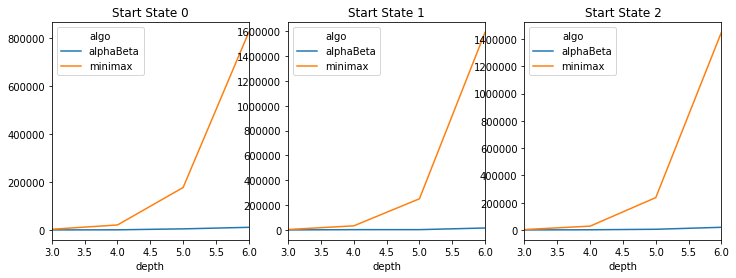

In [8]:
display(Markdown('### <center>MiniMax-vs-AlphaBeta on states a,b,c</center>'))
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 4)

dfQ1[dfQ1.initState==0].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 0", ax=axs[0])
dfQ1[dfQ1.initState==1].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 1", ax=axs[1])
_=dfQ1[dfQ1.initState==2].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 2", ax=axs[2])

__Description :__

By plotting the depth of search against number of states visited for both MiniMax and AlphaBeta pruning algos we can evaluate the performance increase that pruning brings.


__Graph Info :__
- xAxis : Depth
- yAxis : Number of nodes visited during graph search
- TraceColors : The different algorithms used for each algo

__Observations :__
- AlphaBeta searched far fewer states for all board configurations
- Number of states visited by MiniMax appears to exponentiate (to be validated next question)

----

### <center>Efficiency at Various Board States</center>

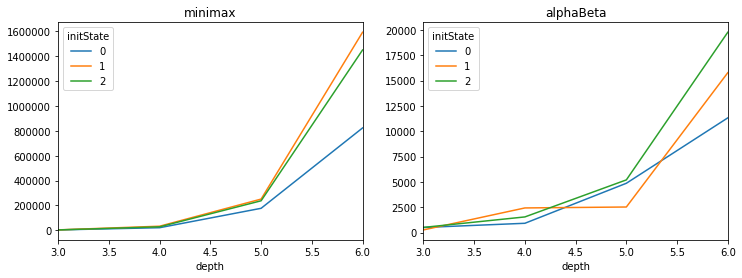

In [9]:
display(Markdown('### <center>Efficiency at Various Board States</center>'))

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

dfQ1[dfQ1.algo=='minimax']\
    .pivot(index='depth', columns='initState', values='statesVisited')\
    .plot(title="minimax", ax=axs[0])
    
_=dfQ1[dfQ1.algo=='alphaBeta']\
    .pivot(index='depth', columns='initState', values='statesVisited')\
    .plot(title="alphaBeta", ax=axs[1])

__Description :__

By plotting the depth-vs-nodes for both MiniMax and AlphaBeta pruning algorithms across the various starting states we can investigate how these 2 algorithms interact with different board configurations


__Graph Info :__
- xAxis : Depth
- yAxis : Number of nodes visited during graph search
- TraceColors : The different starting board formations (0,1,2)

__Observations :__
- Again, we see AlphaBeta visits considerably (orders of magnitude) less states than MiniMax
- Interestingly, AlphaBeta searches oddly very few states at depth 5 for board configuration 1. This is likely because in 4 turns total (ie 2 turns for O), the player can score very highly and therefore many states can be pruned. 

# Question 2 - Estimate Depth->States Formula

> Estimate a formula that relates the depth cutoff to the number of states visited for each of minimax and alpha-beta algorithms.	

__Answer Process :__ 
- Define structure of fitting function
- Using DataFrame from previous test, fit function to Number of Nodes
- Plot resulting function and original data

__Conclusion :__
- AlphaBeta's branching factor is roughly half the size of MiniMax resulting in significant performance increase.
- The theoretical formula of states-visited aligns very closely with the test results in practice.

## Define Formula & Compute Parameters

The number of nodes explored by the minimax algorithm is defined theoretically as : 
<center>$N_{mm} = O(b^d)$</center>

- $N_{mm}$ is the number of nodes visited
- $b$ is the branching factor
- $d$ is the search depth

Obviously the branching factor is an approximation because the number of possible moves for each piece is typically 4 but not always (edge of board, proximity with other pieces). By using the same board states for both AlphaBeta and MiniMax we can guarantee that the actual branching factor will be the same between trials because game-treee (and hence the actual branching factor) is a result of game state rather than the game agent.

Based on the theoretical forumlation of depth to nodes we will define the parameterized function as follows :

<center>$y = ae^{bx}$</center>

- $y$ is the estimated number of nodes visited (ie N_{mm})
- $a$ is the tunable parameter representing branching factor
- $b$ is the tunable parameter scaling search depth
- $x$ is the inputted search depth

In [10]:
from scipy.optimize import curve_fit

In [11]:
def depthComplexityFit(depth, a, b):
    return a*np.e**(b*depth)

In [12]:
dfMinimax = dfQ1[dfQ1.algo=='minimax']
dfAlphaBeta = dfQ1[dfQ1.algo=='alphaBeta']
dfMinimaxFit = pd.DataFrame(columns=dfMinimax.columns)
dfMinAlphaBeta = pd.DataFrame(columns=dfAlphaBeta.columns)

## Compute best fit parameters
miniMaxParams, _ = curve_fit(depthComplexityFit, dfMinimax['depth'], dfMinimax['statesVisited'])
alphaBetaParams, _ = curve_fit(depthComplexityFit, dfAlphaBeta['depth'], dfAlphaBeta['statesVisited'])

After fitting the function $y = ae^{bx}$ to the measured test results for MiniMax and AlphaBeta the parameters were as follows : 

In [13]:
display(Markdown("__MiniMax :__"))
markdownStr = "<center>$N_{mm} = O(b^d) = "\
    +str(miniMaxParams[0].round(2))+"e^{"+str(miniMaxParams[1].round(2))+\
    "d} = "+str(miniMaxParams[0].round(2))+"("+str((np.e**miniMaxParams[1]).round(2))+")^d$</center>"
Markdown(markdownStr)

__MiniMax :__

<center>$N_{mm} = O(b^d) = 30.53e^{1.78d} = 30.53(5.9)^d$</center>

In [14]:
display(Markdown("__AlphaBeta :__"))
markdownStr = "<center>$N_{\\alpha\\beta} = O(b^d) = "\
    +str(alphaBetaParams[0].round(2))+"e^{"+str(alphaBetaParams[1].round(2))+\
    "d} = "+str(alphaBetaParams[0].round(2))+"("+str((np.e**alphaBetaParams[1]).round(2))+")^d$</center>"
Markdown(markdownStr)

__AlphaBeta :__

<center>$N_{\alpha\beta} = O(b^d) = 8.21e^{1.26d} = 8.21(3.52)^d$</center>

__Comparing Branching Factors :__

By algebraically simplifying the parameterized fitting function we can see that the branching factor for AlphaBeta is considerable lower than that of MiniMax. 

---

## Graph Best Fit Line

In [15]:
def buildBestFitDf(algoName, xPoints, curveFn, algoParams):
    dfAlgoFit = pd.DataFrame(columns=dfQ1.columns)
    dfAlgoFit.depth = xPoints
    dfAlgoFit.statesVisited = [curveFn(d, *algoParams) for d in xPoints]
    dfAlgoFit.initState = 'fit'
    dfAlgoFit.algo = algoName
    return dfAlgoFit

In [16]:
dfMinimaxFit = buildBestFitDf('minimax',dfMinimax.depth.unique(), depthComplexityFit, miniMaxParams)
dfAlphaBetaFit = buildBestFitDf('alphaBeta',dfAlphaBeta.depth.unique(), depthComplexityFit, alphaBetaParams)

### <center>Fitting MiniMax-AlphaBeta Complexity</center>

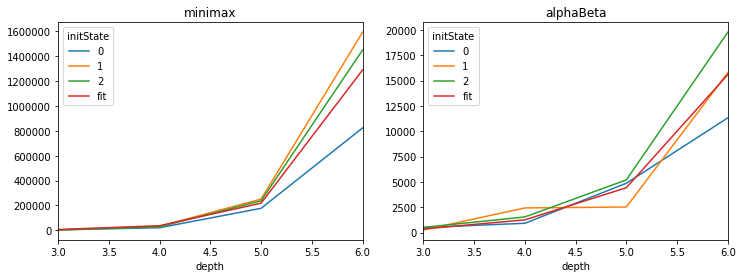

In [17]:
display(Markdown('### <center>Fitting MiniMax-AlphaBeta Complexity</center>'))
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

dfMinimax.append(dfMinimaxFit).pivot(index='depth', columns='initState', values='statesVisited').plot(title="minimax", ax=axs[0])
_=dfAlphaBeta.append(dfAlphaBetaFit).pivot(index='depth', columns='initState', values='statesVisited').plot(title="alphaBeta", ax=axs[1])


__Description :__

Similar to above, by plotting the depth-vs-nodesVisited for both MiniMax and AlphaBeta algorithms across the starting states we can investigate how accurately our fitted complexity function models the observed behaviour of each algorithm.

__Graph Info :__
- xAxis : Depth
- yAxis : Number of nodes visited during graph search
- TraceColors : The different starting board formations (0,1,2)
- Note : Red line is the approximated complexity function

__Observations :__
- The parameterized function is able very closely model the search algorithms' efficency. Therefore, the above comparison of fitted parameters is an apt quantitative comparison of these 2 algorithms

# Question 3 - Impact of Exploration Order on Efficiency

> Explain whether the number of states explored depends on the order in which you generate new states during the search. Justify your response using results from your program.	

__Answer Process :__ 
- Modify AlphaBeta function to accept optional sorting parameter
- Track performance of AlphaBeta with different sorting strategies
- Plot performance

__Conclusion :__
- For AlphaBeta pruning the order in which states are generated does impact the number of states explored during the search.
- Order (worst to best) : ascending, random, no-sorting, descending

In [18]:
def alphaBetaSorted(stateStr, player, depth, alpha=-np.inf, beta=np.inf, order='ignore'):
    if hasattr(alphaBetaSorted, 'count'): alphaBetaSorted.count = alphaBetaSorted.count+1
    if (depth, stateStr) in DB_TRANSP: return DB_TRANSP[(depth, stateStr)]
    state = get(stateStr)
    score = scoreMaxConnected(player*-1, state)*player*-1
    if depth==0 or abs(score)==4:
        return (score, state)
    
    actionValues = []
    arrSuccessors = generateSuccessorsForPlayer(player, state)
    arrScores = [scoreMaxConnected(player, st) for st in arrSuccessors]
    
    if order=='ascending':
        sortScores = np.argsort(np.abs(arrScores))
    if order=='descending':
        sortScores = np.argsort(np.abs(arrScores))[::-1]
    if order=='random':
        sortScores = np.arange(0, len(arrSuccessors))
        np.random.shuffle(sortScores)
    if order=='ignore':
        sortScores = np.arange(0, len(arrSuccessors))

    for st in arrSuccessors[sortScores]:
        v, _ = alphaBetaSorted(put(st), player*-1, depth-1, alpha, beta, order)
        
        actionValues.append(v)
        if player>0:
            alpha = max(alpha, v)
        else :
            beta = min(beta, v)
        if beta <= alpha:
            break
    
    bestScore = max(actionValues) if (player > 0) else min(actionValues)
    DB_TRANSP[(depth, stateStr)] = (bestScore, arrSuccessors[actionValues.index(bestScore)])
    return DB_TRANSP[(depth, stateStr)]


In [19]:
def partialWithCount(func, *args, **keywords):
    def newfunc(*fargs, **fkeywords):
        newkeywords = keywords.copy()
        newkeywords.update(fkeywords)
        func.count = newfunc.count
        result = func(*(args + fargs), **newkeywords)
        newfunc.count = func.count
        return result
    newfunc.func = func
    newfunc.args = args
    newfunc.keywords = keywords
    
    return newfunc

In [20]:
fnABdesc = partialWithCount(alphaBetaSorted, order='descending')
fnABdesc.__name__ = "desc"
fnABasc = partialWithCount(alphaBetaSorted, order='ascending')
fnABasc.__name__ = "asc"
fnABrand = partialWithCount(alphaBetaSorted, order='random')
fnABrand.__name__ = "rand"
fnABignr = partialWithCount(alphaBetaSorted, order='ignore')
fnABignr.__name__ = "ignr"

In [21]:
dfAlphaBetaSorting = runTestGames(TEST_DEPTHS, START_STATES, [fnABdesc,fnABasc,fnABrand,fnABignr, alphaBeta])

---

### <center>Sorting Strategies with AlphaBeta</center>

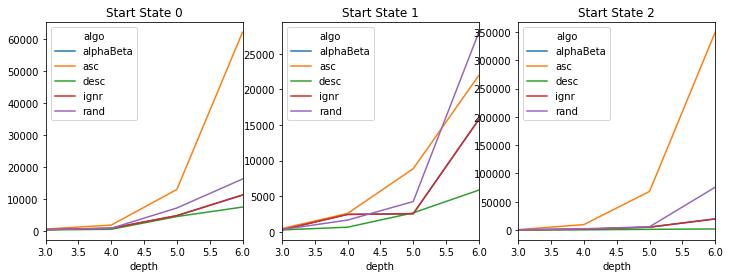

In [22]:
display(Markdown('### <center>Sorting Strategies with AlphaBeta</center>'))

fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 4)

dfAlphaBetaSorting[dfAlphaBetaSorting.initState==0].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 0", ax=axs[0])
dfAlphaBetaSorting[dfAlphaBetaSorting.initState==1].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 1", ax=axs[1])
_=dfAlphaBetaSorting[dfAlphaBetaSorting.initState==2].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 2", ax=axs[2])

__Description :__

By plotting the depth-vs-nodes for AlphaBeta Search Strategies across the starting states we can investigate how sorting by score changes amount of pruning taking place

__Graph Info :__
- xAxis : Depth
- yAxis : Number of nodes visited during graph search
- TraceColors : The different sorting strategies

__Observations :__
- Ascending (expanding worst moves first) is always worse than the others
- Descending is always best
- Interestingly, in states 0 and 2 (where a win is quickly achievable) we see the greatest decrease in performance using ascending sort. This makes intuitive sense because picking 'strategic' moves first has less impact when there is less obvious advantage to be gained in the near term.

__Intuition :__
- AlphaBeta pruning works by not further exploring moves that are proved to be worse than a previously explored state. By sorting in ascending order we never encounter an opportunity to prune and therefore revert to the same performance as minimax.

# Question 4 - Explanation of Heuristic

> Explain the heuristic evaluation function you used and provide a clear rationale for the factors you included.

One advantage of the game state being represented as a matrix is that it is quites likely that your heuristic function can be designed as a matrix operation against the current state.

## Heuristic as Convolution Operation :

In the case of Dynamic Connect 4 the objective is to achieve a particular spatial arrangement of your pieces (ie 4 pieces in a line). Similar to how CNNs operate we can apply a convolution operation to 'detect' or 'highlight' specific piece-configurations existing inside the 2d game board.

To detect this configuration of pieces on the board we can use a "filter"/"kernel" and convolution operation against the current game state matrix.

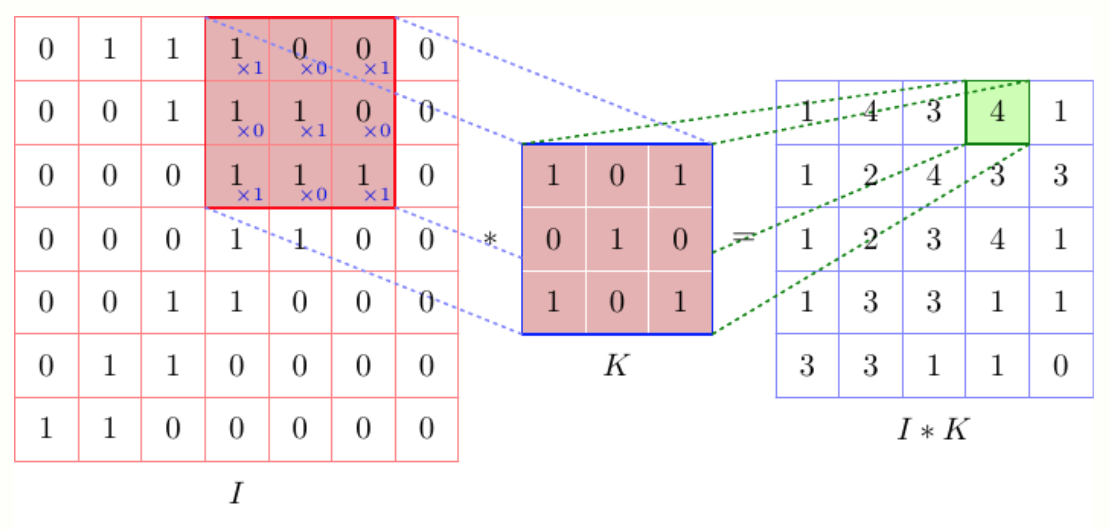


> $score = max(conv_{K_{0-4}}( I_{state} ))$
>
> $K$ : Filter Matrix (4 of them as defined above
>
> $I$ : Game State Matrix

__Basic Approach :__

The following filter matrices were used for counting pieces in a row: 

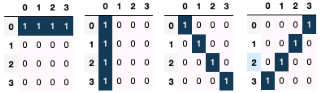

First take the game state to include only pieces of the given player and then convolve the 4 filter matrices, whatever the max value of the resultant matrices is the maximum number of connected pieces.

## Demonstration of Scoring Game States (Basic Approach)

In [23]:
print(' ------- Filter Diagonal 1 ------- ')
print(filtDiag4,'\n')
print(' ------- State from Question 1a ------- ')
print(START_STATES[0])

print(' ------- Resultant Convolution ------- ')
filtConv = ndimage.convolve(strToState(START_STATES[0]), filtDiag4, mode='constant', cval=0.0)
display(pd.DataFrame(filtConv).style.background_gradient())

print(' Score for State (ie max convolution) : ',np.max(np.abs(filtConv)))

 ------- Filter Diagonal 1 ------- 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] 

 ------- State from Question 1a ------- 

 , , , , , , 
 , , , , , , 
O, ,X, , , , 
 , , ,O, , ,X
 , , , ,O,X,X
 , ,O, , ,O,X
 , , ,X,O, , 
 
 ------- Resultant Convolution ------- 


,0,1,2,3,4,5,6
0,-1,0,0,0,0,0,0
1,0,0,0,0,-1,0,0
2,1,0,1,-1,-1,-1,0
3,1,1,0,2,-2,-1,-1
4,0,0,1,0,3,-2,-1
5,0,0,0,1,0,2,-2
6,0,0,0,0,1,0,1


 Score for State (ie max convolution) :  3


## Improving the Heuristic

__Adding 'Awareness'__

The basic approach works just fine but has some a couple short-comings. 
- It has no 'periphery', ie it has no concept of pieces being 'almost' in a line
- No awareness of position of opponent pieces. Surely we want to penalize states where there are many opponent pieces nearby.

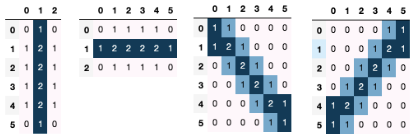

Adding 'fuzzyness' to the convolution allows for 'peripheral' abilities and including opposing pieces in the calculation incorporates the penalizing aspect.

__Combining Heuristics :__

By adding the scores of both the basic convolutions and fuzzy convolutions we can build a robust heuristic function for approximating the utility of a given state. The speed/accuracy trade-off of this combined heuristic is explored next..

__Note about scaling :__ When adding both heuristics together I scaled the fuzzyHeuristic output such that it returns values no greater than one. In this way the search algorithms will always prioritize connecting additional pieces because increments of the basic heuristic are larger than total value of fuzzyHeuristic.

# Question 5 - Complexity of Heuristic Function

> Discuss the computational trade-offs with respect to the use of a more complex evaluation function and the depth of the game tree that can be evaluated.

__Answer Process :__ 

- Modify AlphaBeta function to accept heuristic parameter
- Track performance of AlphaBeta with different basic and advanced heuristics
- Plot performance

__Conclusion :__
- More complex heuristic obviously will take longer to compute but also may change the number of nodes your GameAgent searches which will also impact execution time.
- Setting up a synthetic graph search problem is a good way to measure heuristic 'accuracy'.

## Heuristic Speed

In [24]:
testState = strToState(startingStates['a'])

__Speed Test__ :

As outlined above (and in the implementation docs), the combined heuristic uses encorporates both the basic heuristic as well as the fuzzy heuristic. This boils down to computing 8 convolutions against the game state for combined heuristic and 4 convolutions for basic heuristic.

Both the basic heuristic and the combined heuristic are timed below : 

In [25]:
display('%timeit -n 5000 basicHeuristic')
%timeit -n 5000 scoreMaxConnected(1, testState)

'%timeit -n 5000 basicHeuristic'

115 µs ± 3.69 µs per loop (mean ± std. dev. of 7 runs, 5000 loops each)


In [26]:
display('%timeit -n 5000 combinedHeuristic')
%timeit -n 5000 fuzzyHeuristic(1, testState)

'%timeit -n 5000 combinedHeuristic'

237 µs ± 3.93 µs per loop (mean ± std. dev. of 7 runs, 5000 loops each)


In [27]:
def alphaBetaHeuristic(stateStr, player, depth, alpha=-np.inf, beta=np.inf, order='ignore', heuristic=None):
    if hasattr(alphaBetaHeuristic, 'count'): alphaBetaHeuristic.count = alphaBetaHeuristic.count+1
    if (depth, stateStr) in DB_TRANSP: return DB_TRANSP[(depth, stateStr)]
    state = get(stateStr)
    score = heuristic(player*-1, state)*player*-1
    if depth==0 or abs(score)>=4:
        return (score, state)
    
    actionValues = []
    arrSuccessors = generateSuccessorsForPlayer(player, state)
    arrScores = [heuristic(player, st) for st in arrSuccessors]
    
    if order=='ascending':
        sortScores = np.argsort(np.abs(arrScores))
    if order=='descending':
        sortScores = np.argsort(np.abs(arrScores))[::-1]
    if order=='random':
        sortScores = np.arange(0, len(arrSuccessors))
        np.random.shuffle(sortScores)
    if order=='ignore':
        sortScores = np.arange(0, len(arrSuccessors))

    for st in arrSuccessors[sortScores]:
        v, _ = alphaBetaHeuristic(put(st), player*-1, depth-1, alpha, beta, order, heuristic=heuristic)
        
        actionValues.append(v)
        if player>0:
            alpha = max(alpha, v)
        else :
            beta = min(beta, v)
        if beta <= alpha:
            break
    
    bestScore = max(actionValues) if (player > 0) else min(actionValues)
    DB_TRANSP[(depth, stateStr)] = (bestScore, arrSuccessors[actionValues.index(bestScore)])
    return DB_TRANSP[(depth, stateStr)]


In [28]:
fnABHeurBasic = partialWithCount(alphaBetaHeuristic, heuristic=scoreMaxConnected)
fnABHeurBasic.__name__ = "basic"
fnABHeurComb = partialWithCount(alphaBetaHeuristic, heuristic=fuzzyHeuristic)
fnABHeurComb.__name__ = "combined"

dfQ5a = runTestGames(TEST_DEPTHS, START_STATES, [fnABHeurBasic, fnABHeurComb], verbose=False)


----

### <center>Execution time Basic vs Combined Heuristic</center>

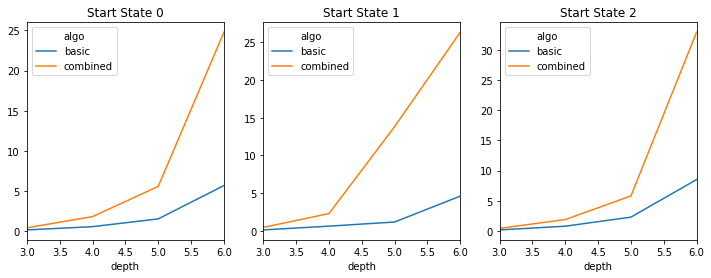

In [29]:
display(Markdown('### <center>Execution time Basic vs Combined Heuristic</center>'))
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 4)

dfQ5a[dfQ5a.initState==0].pivot(index='depth', columns='algo', values='time').plot(title="Start State 0", ax=axs[0])
dfQ5a[dfQ5a.initState==1].pivot(index='depth', columns='algo', values='time').plot(title="Start State 1", ax=axs[1])
_=dfQ5a[dfQ5a.initState==2].pivot(index='depth', columns='algo', values='time').plot(title="Start State 2", ax=axs[2])

__Description :__

By plotting the depth of search against the execution for both basic and combined heuristics we can measure the impact that additional heuristic complexity has on speed.

__Graph Info :__
- xAxis : Depth
- yAxis : Execution time (seconds)
- TraceColors : The different heuristics used

__Observations :__
- Combined heuristic does indeed search slower than basic
- Interstingly the gap between basic and combined execution times widens at an increasing rate. This doesn't seem to match the 2x speed decrease we were seeing when running testing loop

----

### <center>Nodes Visited - Basic vs Combined Heuristic</center>

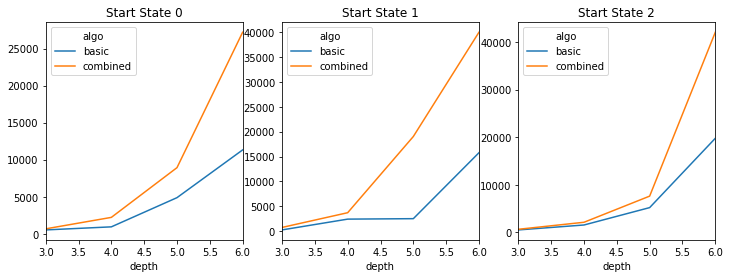

In [30]:
display(Markdown('### <center>Nodes Visited - Basic vs Combined Heuristic</center>'))
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 4)

dfQ5a[dfQ5a.initState==0].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 0", ax=axs[0])
dfQ5a[dfQ5a.initState==1].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 1", ax=axs[1])
_=dfQ5a[dfQ5a.initState==2].pivot(index='depth', columns='algo', values='statesVisited').plot(title="Start State 2", ax=axs[2])

__Description :__

By plotting the depth of search against the number of nodes visited for both basic and combined heuristics we can measure the impact that additional heuristic complexity has on states visited.

__Graph Info :__
- xAxis : Depth
- yAxis : Number of states visited
- TraceColors : The different heuristics used

__Observations :__
- Interestingly, with a compound heuristic the game agent ends up evaluating more states (seemingly a higher branching factor).
- Some of the speed decrease from more complex heuristic function can be attributed to evaluating more nodes.
- Comparing the execution speeds of different heuristics cannot be the only thing used when comparing different heuristics.

## Heuristic Accuracy 

Theoretically the true accuracy of a heuristic can only be evaluated by exploring the entire game tree and comparing the true utility of a game state vs the estimated value from the heuristic. Obviously exploring the entire game tree is not feasible as an approach to answering (ie quantifying) the issue of heuristic accuracy. 

Conceptually, a more 'accurate' heuristic function should enable your agent to more effectively score game states and hence better naviagate the game tree in search of its goal.

We can setup a simple synthetic A* search problem and see which heuristics find the solution in the least number of nodes explored. With a perfect heuristic the nodes searched by A* would be exactly the nodes needed to traverse to achieve the goal. Worst case scenario A* searches with BFS complexity

----

In [31]:
DB_STATE = {}
def put(state):
    strHash = sha1(state.tobytes()).hexdigest()
    DB_STATE[strHash] = state
    return strHash

def get(strHash):
    return DB_STATE[strHash]

class DynamicConnect4Fuzzy(SearchProblem):
    def __init__(self, *args, **kwargs):
        SearchProblem.__init__(self, *args, **kwargs)
        self.count = 0

    def actions(self, state):
        return generateMovesForPlayer(1, get(state))
    def result(self, state, action):
        return put(get(state) + action)
    def is_goal(self, state):
        isGoal = tmpHeuristic(1, get(state))>=4
        self.count += 1
#         print('isGoal',isGoal)
        return isGoal
    def heuristic(self, state):
        score = 4-tmpHeuristic(1, get(state))
#         print('state, score', state, score)
        return score

In [32]:
dfQ5b = pd.DataFrame(columns=['search_algo','heuristic','statesVisited','initState','time','cost'])

test_heuristics = [scoreMaxConnected, fuzzyHeuristic]
for heur in test_heuristics:
    for searchAlgo in [breadth_first, astar]:
        for stateNum, startStr in startingStates.items():
            startTime = time.time()
            
            tmpHeuristic = heur
            problem = DynamicConnect4Fuzzy(initial_state=put(strToState(startStr)))
            result = searchAlgo(problem)
            
            rowObj = {
                'search_algo':searchAlgo.__name__,
                'heuristic':heur.__name__,
#                 'depth':depth ,
                'statesVisited':problem.count ,
                'initState':stateNum ,
                'time':time.time()-startTime,
                'cost':result.cost
            }

            dfQ5b= dfQ5b.append(rowObj, ignore_index=True)
            # if verbose : print(rowObj)


In [33]:
display(Markdown('### Various Heuristics and Test Performance - DataFrame'))
dfQ5b

### Various Heuristics and Test Performance - DataFrame

,search_algo,heuristic,statesVisited,initState,time,cost
0,breadth_first,scoreMaxConnected,153,a,0.060142,2
1,breadth_first,scoreMaxConnected,212904,b,104.027003,5
2,breadth_first,scoreMaxConnected,71,c,0.030362,2
3,astar,scoreMaxConnected,9,a,0.029872,2
4,astar,scoreMaxConnected,3469,b,10.028145,5
5,astar,scoreMaxConnected,5,c,0.013476,2
6,breadth_first,fuzzyHeuristic,153,a,0.078964,2
7,breadth_first,fuzzyHeuristic,212904,b,118.795274,5
8,breadth_first,fuzzyHeuristic,71,c,0.039386,2
9,astar,fuzzyHeuristic,4,a,0.021523,2


----

### <center>How Many States Before Finding Goal?</center>

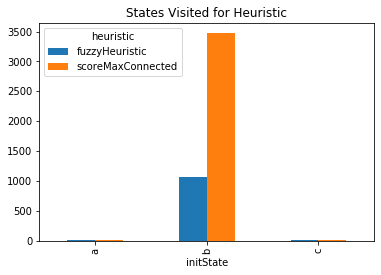

In [34]:
display(Markdown('### <center>How Many States Before Finding Goal?</center>'))
_=dfQ5b[dfQ5b.search_algo=='astar'].pivot(index='initState', columns='heuristic', values='statesVisited').plot.bar(title="States Visited for Heuristic")


__Description :__

By plotting the number of states searched by A* before finding its goal we can roughly get a measure of accuracy of our heuristic function. Conceptually a heuristic that guides the algorithm perfectly to the goal state has the most accurate calculation of a game state's utility.

__Graph Info :__
- xAxis : Different Start States
- yAxis : Number of states visited
- TraceColors : The different heuristics used

__Observations :__
- The fuzzyHeuristic was able to find the solution to state b significantly faster than the basic (scoreMaxConnected) heuristic could.